In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as ptl

In [60]:
# get the information of the information of NUS
train = pd.read_csv("/home/suman/Downloads/Meritrank/NFT/sample.csv")
print(train.shape)

S = (train.shape)

(2094, 200)


In [61]:
train.head()

,ID_BB_COMPANY,bond_isin,default_date,rr1_7,rr2_7,rr1_30,rr2_30,currency,seniorioty,seniorioty_adj,...,PD_58_pd,PD_59_pd,PD_60_pd,dummyfin,coupon_category,duration_category,DTD,NI_Over_TA,Size,defaulted_in_last_6_months
0,129240,CH0002725106,03-08-1996 00:00,0.721750,0.718437,0.466602,0.464364,USD,Unsecured,Unsecured,...,NaN,NaN,NaN,NaN,1.0,2,NaN,NaN,-0.145459,False
1,116977,US704378AD06,21-07-1997 00:00,0.247997,0.241752,0.212016,0.205964,USD,Senior Subordinated Unsecured,Senior Subordinated Unsecured,...,0.561355,0.561903,0.562430,0.0,4.0,2,-0.767563,-0.003347,-1.424423,False
2,103782,US318908AA80,01-08-1997 00:00,0.675271,0.673903,0.593823,0.590595,USD,Subordinated Unsecured,Subordinated Unsecured,...,0.117021,0.117188,0.117349,0.0,4.0,3,-0.718216,-0.005708,-3.235306,False
3,129443,CH0001237681,15-10-1997 00:00,1.018514,1.017482,1.018567,1.017481,CHF,Unsecured,Unsecured,...,NaN,NaN,NaN,NaN,1.0,2,NaN,NaN,NaN,False
4,129443,CH0001352027,15-10-1997 00:00,0.851555,0.848116,0.851770,0.848148,CHF,Unsecured,Unsecured,...,NaN,NaN,NaN,NaN,1.0,2,NaN,NaN,NaN,False


In [62]:
# Checking for missing information from the information of NUS for missing information NaN
Kus = pd.concat([train.isnull().sum()], axis =1, keys = ["Train"])
Kus[Kus.sum(axis=1)> 0]

,Train
coupon rate,1
coupon frequency,43
maturity_type,83
call type,1402
put type,1838
...,...
dummyfin,752
coupon_category,1
DTD,169
NI_Over_TA,86


In [63]:
train ["coupon rate"] = train ["coupon rate"].fillna(train["coupon rate"].mean())
#train ["coupon_category"] = train ["coupon_category"].fillna(train["coupon_category"].mean())
train ["US Corporate Bond Yield Spread(10+ year)"] = train ["US Corporate Bond Yield Spread(10+ year)"].fillna(train["US Corporate Bond Yield Spread(10+ year)"].mean())
train ["US Corporate Bond Yield Spread"] = train ["US Corporate Bond Yield Spread"].fillna(train["US Corporate Bond Yield Spread"].mean())
train ["US Corporate Bond Yield Spread(1-3 year)"] = train ["US Corporate Bond Yield Spread(1-3 year)"].fillna(train["US Corporate Bond Yield Spread(1-3 year)"].mean())
train ["US Corporate Bond Yield Spread(3-5 year)"] = train ["US Corporate Bond Yield Spread(3-5 year)"].fillna(train["US Corporate Bond Yield Spread(3-5 year)"].mean())
train ["US Corporate Bond Yield Spread(5-7 year)"] = train ["US Corporate Bond Yield Spread(5-7 year)"].fillna(train["US Corporate Bond Yield Spread(5-7 year)"].mean())
train ["US Corporate Bond Yield Spread(7-10 year)"] = train ["US Corporate Bond Yield Spread(7-10 year)"].fillna(train["US Corporate Bond Yield Spread(7-10 year)"].mean())
train ["US Corporate Bond Yield Spread(10+ year)"] = train ["US Corporate Bond Yield Spread(10+ year)"].fillna(train["US Corporate Bond Yield Spread(10+ year)"].mean())
train ["DTD_Level"] = train ["DTD_Level"].fillna(train["DTD_Level"].mean())
train ["DTD_Trend"] = train ["DTD_Trend"].fillna(train["DTD_Trend"].mean())
train ["CA_Over_CL_Level"] = train ["CA_Over_CL_Level"].fillna(train["CA_Over_CL_Level"].mean())
train ["CA_Over_CL_Trend"] = train ["CA_Over_CL_Trend"].fillna(train["CA_Over_CL_Trend"].mean())
train ["NI_Over_TA_Level"] = train ["NI_Over_TA_Level"].fillna(train["NI_Over_TA_Level"].mean())
train ["NI_Over_TA_Level"] = train ["NI_Over_TA_Level"].fillna(train["NI_Over_TA_Level"].mean())
train ["JP_market_sentiment"] = train ["JP_market_sentiment"].fillna(train["JP_market_sentiment"].mean())
train ["coupon_category"] = train ["coupon_category"].fillna(train["coupon_category"].mode()[0])
train ["dummyfin"] = train ["dummyfin"].fillna(train["dummyfin"].mode()[0])

In [64]:
train ["coupon_category"] = train ["coupon_category"].apply(str)
train ["duration_category"] = train ["duration_category"].apply(str)

In [65]:
## Getting dummies from all other categorical vars
for col in train.dtypes[train.dtypes == "object"].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)],axis=1)
train.head()

,ID_BB_COMPANY,rr1_7,rr2_7,rr1_30,rr2_30,coupon rate,coupon frequency,SP500 MD,Average daily 1-year SP500 return,US Corporate Bond Yield Spread,...,coupon_category_1.0,coupon_category_2.0,coupon_category_3.0,coupon_category_4.0,coupon_category_5.0,duration_category_1,duration_category_2,duration_category_3,duration_category_4,duration_category_5
0,129240,0.721750,0.718437,0.466602,0.464364,0.750,1.0,39.34404,0.004729,160.915646,...,1,0,0,0,0,0,1,0,0,0
1,116977,0.247997,0.241752,0.212016,0.205964,9.125,2.0,148.54344,0.005827,160.915646,...,0,0,0,1,0,0,1,0,0,0
2,103782,0.675271,0.673903,0.593823,0.590595,9.000,2.0,172.04832,0.005720,160.915646,...,0,0,0,1,0,0,0,1,0,0
3,129443,1.018514,1.017482,1.018567,1.017481,0.125,1.0,136.14092,0.005434,160.915646,...,1,0,0,0,0,0,1,0,0,0
4,129443,0.851555,0.848116,0.851770,0.848148,0.500,1.0,136.14092,0.005434,160.915646,...,1,0,0,0,0,0,1,0,0,0


In [66]:
labels = train.pop("duration_category")

KeyError: 'duration_category'

In [72]:
import pandas as pd

# Load the data
train = pd.read_csv("/home/suman/Downloads/Meritrank/NFT/sample.csv")

# Process categorical data, excluding 'duration_category'
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    train = pd.concat([train.drop(col, axis=1), pd.get_dummies(train[col], prefix=col)], axis=1)

# Now, 'duration_category' is ready to be used as a label or for further processing
labels = train.pop("duration_category")
labels = train.pop("coupon_category")


In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, lebels, test_size =0.25)

ModuleNotFoundError: No module named 'sklearn'

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier
rf.fit(x)

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

In [84]:
import pandas as pd

# Load the data
train = pd.read_csv("/home/suman/Downloads/Meritrank/NFT/sample.csv")

# Process categorical data, excluding 'duration_category'
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    train = pd.concat([train.drop(col, axis=1), pd.get_dummies(train[col], prefix=col)], axis=1)

# Now, 'duration_category' is ready to be used as a label or for further processing
labels = train.pop("duration_category")
labels = train.pop("coupon_category")

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, lebels, test_size =0.25)

NameError: name 'lebels' is not defined

In [87]:
import numpy as np

# Filling NaN values with the mean of each column in x_train
x_train = x_train.fillna(x_train.mean())

# Checking for infinite values and replacing them with NaN, then filling with the mean
x_train = x_train.replace([np.inf, -np.inf], np.nan).fillna(x_train.mean())

# Now try fitting the model again
rf = RandomForestClassifier()
rf.fit(x_train, y_train)



RandomForestClassifier()

In [90]:
y_pred = rf.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [91]:
import numpy as np

# Filling NaN values with the mean of each column in x_test
x_test = x_test.fillna(x_train.mean())  # Using the training mean ensures no data leakage

# Checking for infinite values and replacing them with NaN, then filling with the mean
x_test = x_test.replace([np.inf, -np.inf], np.nan).fillna(x_train.mean())

# Now, try making predictions
y_pred = rf.predict(x_test)


In [93]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [94]:
import numpy as np

# Check and handle NaN or infinite values in y_test if not already handled
y_test = np.nan_to_num(y_test)  # Convert NaNs or inf to numbers, typically not recommended without understanding the data

# Since y_pred should ideally contain no NaNs or infs if it's just class labels, this might be unnecessary, but let's ensure:
y_pred = np.nan_to_num(y_pred)


In [95]:
from sklearn.metrics import roc_curve, auc

# Ensure to use predict_proba to get the probabilities of the positive class
y_probs = rf.predict_proba(x_test)[:, 1]  # Assuming the positive class is at index 1

# Compute ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


ValueError: multiclass format is not supported

In [96]:
from sklearn.preprocessing import label_binarize

# Binarize the output
classes = np.unique(y_train)  # Ensure to include all classes seen during training
y_test_bin = label_binarize(y_test, classes=classes)

# Assuming you want to check the performance for the first class
class_index = 0  # Change this index based on the class you are interested in

# Get probabilities for the specific class
y_probs = rf.predict_proba(x_test)[:, class_index]

# Compute ROC curve for the specific class
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_bin[:, class_index], y_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.9697572314049587

In [97]:
n_estimators =  [1, 5, 10, 20, 30, 40, 50, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators: 
    rf= RandomForestClassifier(n_estimators = estimator, n_jobs =-1)
    rf.fit(x_train, y_train)
    train_pred= rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
    roc_auc= auc(false_positive_rate, true_positive_rate) 
    train_results.append(roc_auc)
    y_pred= rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc= auc(false_positive_rate, true_positive_rate) 
    test_results.append(roc_auc)
    
from matplotlib.legand_haldler import HanlderLine2D
Line1, = plt.plot(n_estimators,train_results, "b", label="Train AUC")
Line2, = plt.plot(n_estimators,test_results, "r", label="Test AUC")
plt.legand(handler_map={line1:HanlderLine2D(numpoints =2)})
plt.ylabel("AUC Score")
plt.xlable("n_estimators")
plt.show()
    

ValueError: multiclass format is not supported

In [98]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_estimators = [1, 5, 10, 20, 30, 40, 50, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train, y_train)
    
    # Get the probability scores for the positive class
    train_probs = rf.predict_proba(x_train)[:, 1]  # Adjust the index based on the class of interest
    test_probs = rf.predict_proba(x_test)[:, 1]

    # Calculate ROC AUC for training data
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_probs)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    # Calculate ROC AUC for testing data
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_probs)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

# Plot results
plt.plot(n_estimators, train_results, "b", label="Train AUC")
plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend()
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()


ValueError: multiclass format is not supported

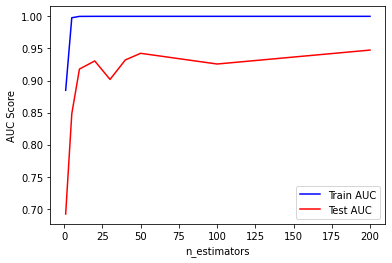

In [99]:
from sklearn.preprocessing import label_binarize

# Binarize labels
classes = np.unique(y_train)
y_train_bin = label_binarize(y_train, classes=classes)[:, 1]  # Choose the class index appropriately
y_test_bin = label_binarize(y_test, classes=classes)[:, 1]

n_estimators = [1, 5, 10, 20, 30, 40, 50, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train, y_train)
    
    # Get the probability scores for the positive class
    train_probs = rf.predict_proba(x_train)[:, 1]  # Assuming class 1 is the positive class
    test_probs = rf.predict_proba(x_test)[:, 1]

    # Calculate ROC AUC for training data
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_bin, train_probs)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    # Calculate ROC AUC for testing data
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_bin, test_probs)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

# Plot results
plt.plot(n_estimators, train_results, "b", label="Train AUC")
plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend()
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()


In [31]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.51428571 0.65238095 0.9047619  0.9        0.97129187 0.97607656
 0.96650718 0.86602871 0.64593301 0.93301435]
Mean CV Accuracy: 0.8330280246069719


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Initialize the RandomForest with adjusted parameters to reduce overfitting
rf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=4, random_state=42)

# Fit the model on the full dataset to perform feature selection
rf.fit(X, y)

# Select features based on importance
selector = SelectFromModel(rf, prefit=True)
X_new = selector.transform(X)

# Print the number of features selected
print("Selected features:", X_new.shape[1])

# Perform cross-validation with the selected features
cv_scores_new = cross_val_score(rf, X_new, y, cv=10)

print("New Cross-Validation Accuracy Scores:", cv_scores_new)
print("New Mean CV Accuracy:", cv_scores_new.mean())


Selected features: 28
New Cross-Validation Accuracy Scores: [0.86666667 1.         1.         1.         1.         1.
 1.         0.99521531 1.         1.        ]
New Mean CV Accuracy: 0.9861881977671452


In [33]:
import shap

# Initialize the SHAP Explainer with the RandomForest model
explainer = shap.TreeExplainer(rf)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


ModuleNotFoundError: No module named 'shap'

/home/suman/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


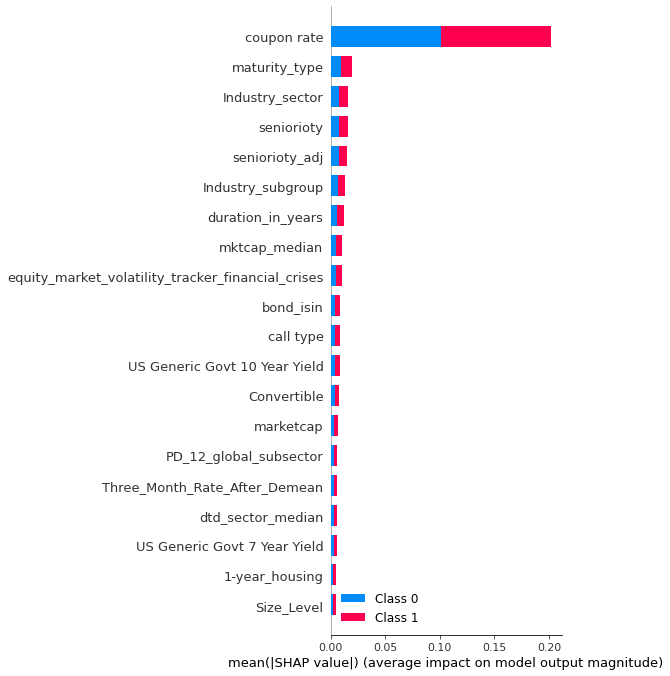

In [34]:
import shap

# Initialize the SHAP Explainer with the RandomForest model
explainer = shap.TreeExplainer(rf)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


+----------------------+-------------------+---------------------+--------------------+
| Precision (Weighted) | Recall (Weighted) | F1 Score (Weighted) | Balanced Accuracy  |
+----------------------+-------------------+---------------------+--------------------+
|  0.9831346311237107  | 0.982824427480916 |  0.982927783803138  | 0.9772175193227826 |
+----------------------+-------------------+---------------------+--------------------+


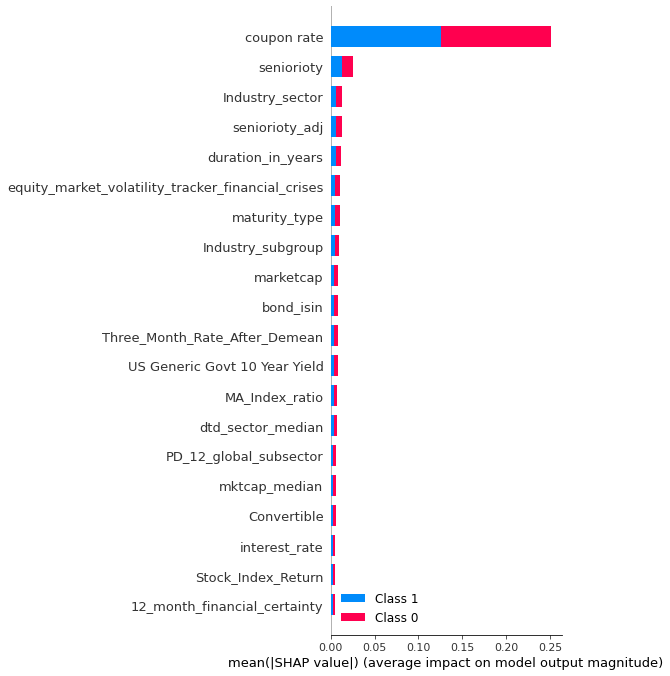

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tabulate import tabulate
import shap

# Load the dataset
df = pd.read_csv('/home/suman/Downloads/Meritrank/NFT/sample.csv')

# Handle missing values
df.fillna(df.median(), inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Scale the features
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)

# Setup data for modeling
target = 'coupon_category'  # Update with the actual name of the target column
X = df.drop(target, axis=1)
y = df[target].astype(int)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate performance metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame({
    "Precision (Weighted)": [precision],
    "Recall (Weighted)": [recall],
    "F1 Score (Weighted)": [f1],
    "Balanced Accuracy": [balanced_accuracy]
})

# Display the DataFrame using tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

# SHAP Values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)
